# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [20]:
#! pip install pandas
#!pip install -U matplotlib
import pandas as pd


## Read in the file `craftcans.csv`, and look at the first first rows

In [21]:
df = pd.read_csv('craftcans.csv', na_values=['Does not apply'])

## How many rows do you have in the data? What are the column types?

In [22]:
df.shape
# It looks like there are 2416 rows in the data

(2416, 7)

In [23]:
df.dtypes

# All the columns except for 'IBUs' are strings. 'IBUs' is a float

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [24]:
# To get the top 10 producers, I use .value_counts()
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [25]:
# Here I only get the first row, because we are only interested in
# the most common ABV.
df.ABV.value_counts().head(1)
# The most common ABV is 5%

5.00%    215
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [26]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [27]:
# First I replace the % with nothing

df.ABV = df.ABV.str.replace("%","")
df.ABV

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [28]:
# And then I turn it into numeric data. I choose float to keep the decimals.
df.ABV = df.ABV.astype(float)
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [29]:
# First I use .describe() to get the median, mean etc.
df.ABV.describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

<AxesSubplot: >

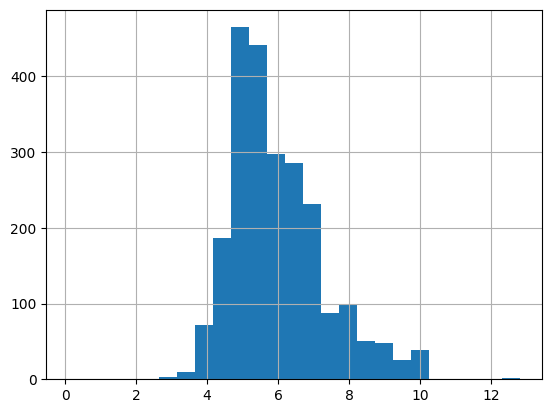

In [30]:
# And afterwards I plot the data as a histogram to get at better sense of 
# the distribution.
df.ABV.hist(bins=25)

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [32]:
df.ABV.notnull().value_counts()
# it looks like there are 68 entities that are missing

True     2348
False      68
Name: ABV, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [33]:
# Here I use .value_counts() on the column 'Location' df[df.Location =='Brooklyn, NY']
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [34]:
df[df.Location =='Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [38]:
# First I specify that I only want the breweries located in Brooklyn
# and then I use .value_counts() count how many times each brewery appear
# in the table : once for each can of beer.
df[(df.Location =='Brooklyn, NY')]['Brewery'].value_counts().head(1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [39]:
# Here I specify that I only want the rows where the brewery is 'Sixpoint Craft Ales'
# and then I count the styles and get the five most popular ones.
df[df.Brewery == 'Sixpoint Craft Ales'].Style.value_counts().head(5)

American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [40]:
# First I get the rows where the 'Location' column contains NY (it could and probably do
# contain other things too). Then I specify that I want to leave out NaN values using na=False

df[df.Location.str.contains('NY',na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,NaN
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,NaN


### Now *count* all of the breweries in New York state

In [42]:
# There I add .Brewery.value_counts().shape 
df[df.Location.str.contains('NY',na=False)].Brewery.value_counts().shape

(16,)

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [46]:
# Here I take all the rows where the Beer column contains the word "IPA" (and potentially something else)
# and then I count all the IPAs
df[df.Beer.str.contains('IPA.*')].Beer.value_counts()

Dagger Falls IPA      3
Point the Way IPA     2
TailGate IPA          2
Ranger IPA            2
Long Hammer IPA       2
                     ..
Hop Nosh IPA          1
Just IPA              1
Birth IPA             1
Heyoka IPA            1
GUBNA Imperial IPA    1
Name: Beer, Length: 322, dtype: int64

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [47]:
df.IBUs.mean()

42.71316725978647

In [48]:
# If you prefer the median as a measurement of the average, here it is:
df.IBUs.median()

35.0

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

I included ``na_values=['Does not apply']`` when I read in the data, so the above commands did work.

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<AxesSubplot: >

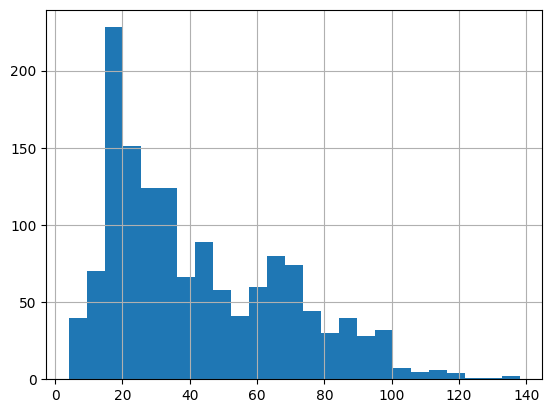

In [50]:
df.IBUs.hist(bins=25)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [52]:
# To get the 75th percentile, I use .describe()
df.IBUs.describe()
# The 75th percentile is 64

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [53]:
# To get all the beers above the 75th percentile, I ask for all the beers with IBUs above 64
df[df.IBUs > 64]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


## List all of the beers with IBUs below the 25th percentile

In [54]:
# We found above that the 25th percentile was 21, so I ask for all the beers with IBUs
# below 21
df[df.IBUs > 21]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.6,47.0
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.3,35.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.0,35.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [55]:
df.groupby('Style').IBUs.median().sort_values(ascending = False)

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

<AxesSubplot: ylabel='Style'>

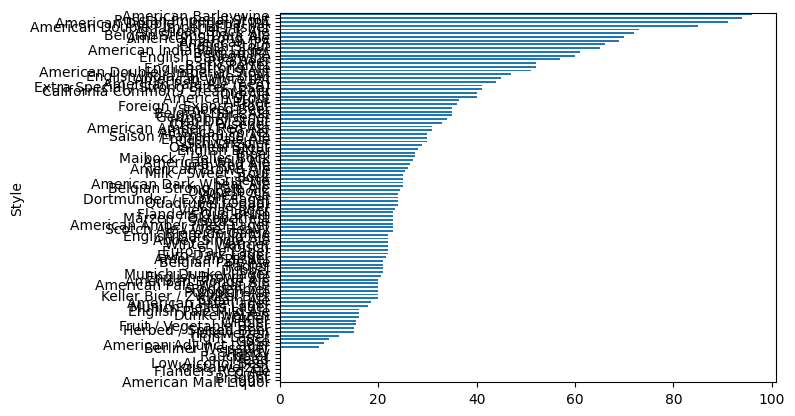

In [56]:
# Here I use a horizontal bar chart, group by 'Style' (I guess this is what you mean by 'Type'???)
# get the median IBU for each style, and plot it ascending and put the missing vlues in the end (although we command 
# first here...)
df.groupby('Style').IBUs.median().sort_values(ascending = True, na_position ='first').plot(kind='barh')

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [57]:
# Here I find the five most common lines of high-IBU beers
df[df.IBUs > 64].Style.value_counts().head(5)

American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

In [58]:
# Here I find the five most common lines of low-IBU beers
df[df.IBUs < 21].Style.value_counts().head(5)

American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [59]:
# I take all the rows where the "Style" column contains 'Witbier','Hefeweizen', 'American Pale Wheat Ale' and store it
# into a new dataframe called wheat_beer
wheat_beer = df[df["Style"].isin(['Witbier','Hefeweizen', 'American Pale Wheat Ale'])]

# And then I find the mean of all the wheat_beers
wheat_beer.IBUs.mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

<AxesSubplot: >

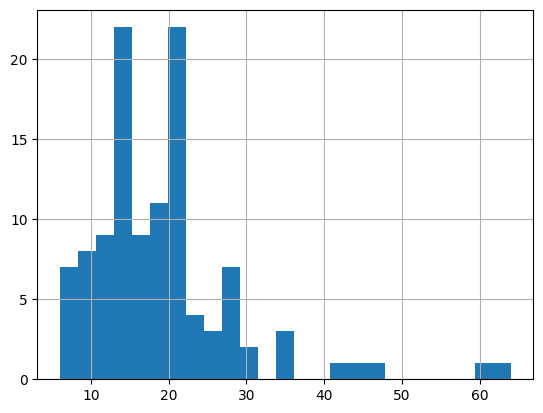

In [60]:
# And then I draw a histogram of the IBUs of the wheat beers.
wheat_beer.IBUs.hist(bins=25)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [66]:
# And then I do the same for the IPAs: I take all the rows where the "Style" column contains 'IPA'and store it
# into a new dataframe called IPA
IPA = df[df.Style.str.contains("IPA.*",na=False)]

# and find the mean of the IPAs
IPA.IBUs.mean()

71.94897959183673

<AxesSubplot: >

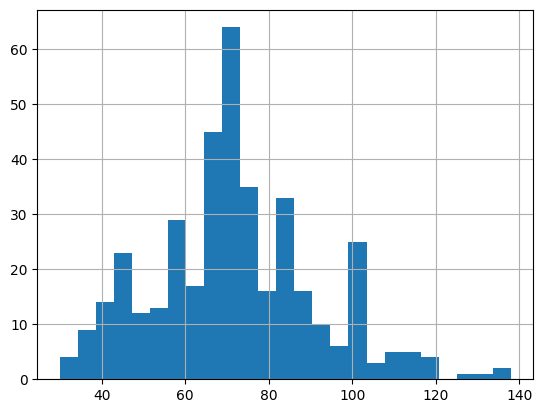

In [68]:
# And plot the IBUs of the IPAs in a histogram
IPA.IBUs.hist(bins=25)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

<AxesSubplot: >

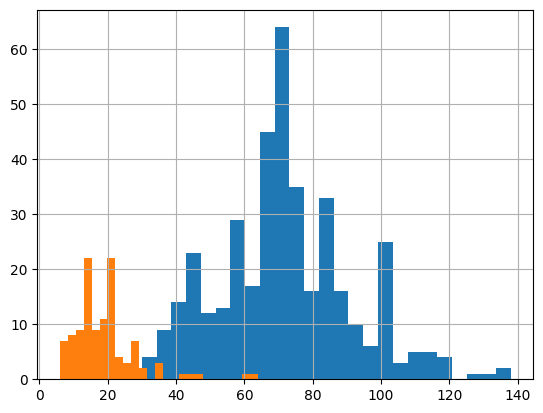

In [70]:
# I take the histogram of the IBUs of the IPAs and stores it in ax
ax = IPA.IBUs.hist(bins=25)

# and then I include ax in the histogram of the IBUs of the IPAs to get a histogram of both distributions
wheat_beer.IBUs.hist(ax=ax, bins=25)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [71]:
# Here I find the mean ABV for the IPAs
IPA.ABV.mean()

6.879285714285714

In [72]:
# And then I do the same for the wheat beers
wheat_beer.ABV.mean()

5.043715846994536

<AxesSubplot: >

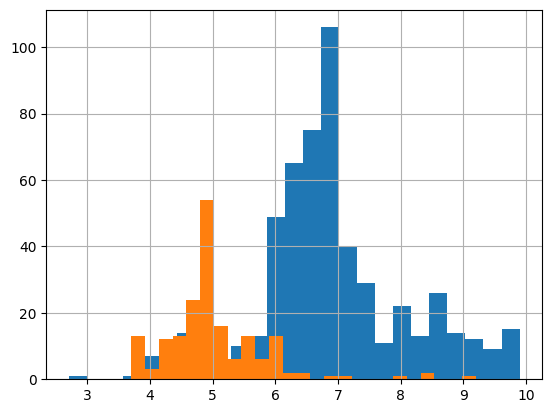

In [73]:
# And then I plot both distributions in a histogram - using the same method as with the IBU distributions.

ax1 = IPA.ABV.hist(bins=25)
wheat_beer.ABV.hist(ax=ax1, bins=25)

## Good work!

If you made it this far you deserve a drink.